In [18]:
import tensorflow as tf
tf.enable_eager_execution()

In [19]:
import random

class Model(object):
    def __init__(self):
        self.W = tf.Variable(random.uniform(0.0, 100.0)) #tf.Variable(5.0)
        self.b = tf.Variable(random.uniform(0.0, 100.0)) #tf.Variable(0.0)
        
    def __call__(self, x):
        return self.W * x + self.b
    
model = Model()
print((model.W.numpy(), model.b.numpy()))
print(model(3.0).numpy())

(99.73516, 39.980724)
339.1862


In [20]:
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

In [21]:
TRUE_W = random.uniform(0.0, 100.0) # 3.0
TRUE_b = random.uniform(0.0, 100.0) # 2.0
NUM_EXAMPLES = 1000

inputs = tf.random_normal(shape=[NUM_EXAMPLES])
noise = tf.random_normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

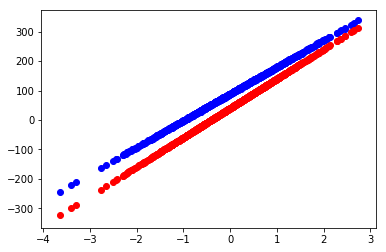

Current loss: 
2457.2886


In [22]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: '),
print(loss(model(inputs), outputs).numpy())

In [23]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

Epoch  0: W=96.15 b=96.24, loss=85.83509
Epoch  1: W=94.07 b=93.23, loss=32.14428
Epoch  2: W=92.80 b=91.41, loss=12.46441
Epoch  3: W=92.02 b=90.32, loss=5.24951
Epoch  4: W=91.55 b=89.66, loss=2.60387
Epoch  5: W=91.25 b=89.27, loss=1.63356
Epoch  6: W=91.08 b=89.03, loss=1.27762
Epoch  7: W=90.97 b=88.88, loss=1.14702
Epoch  8: W=90.90 b=88.80, loss=1.09910
Epoch  9: W=90.86 b=88.74, loss=1.08151


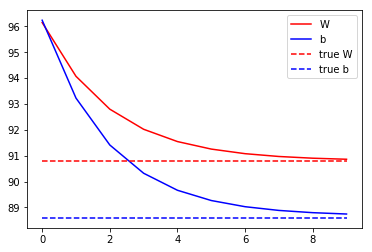

In [25]:
model = Model()

Ws, bs, losses = [], [], []
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    losses.append(loss(model(inputs), outputs))
    
    train(model, inputs, outputs, learning_rate=0.2)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
          (epoch, Ws[-1], bs[-1], losses[-1]))
    
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true b'])
plt.show()

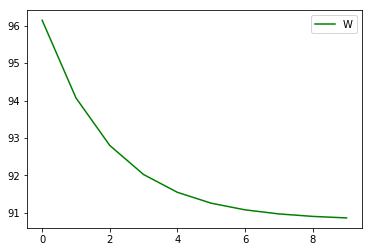

In [26]:
plt.plot(epochs, Ws, 'g')
plt.legend(['W', 'b', 'true W', 'true b'])
plt.show()